## Notebook to graph sp_sysmon output

This notebook will do a plot of the sp_sysmon metrics

input file is a .csv file generated with **sst_sp_sysmon_parser.sh**

sst_sp_sysmon_parser.sh is calling a *awk* file to parse every sp_sysmon output.

The generated file is called *sp_sysmon_<timestamp>_results.csv* and has the following output
  
  
<font color='blue'>date;time;dataserver;version;user_percent;system_percent;io_percent;idle_percent;context switch cache search miss;context switch exceedint IO;context switch system disk;context switch Last log page write;context switch IO device contention;context switch network packet received;context switch network packet sent;housekeeper wash dirty;ulc flush by full ulc; minimally logged ulc flush byfull ulc; ulc log semaphore wait; ulc semaphore wait;all caches hit; all caches miss; all caches buffer grabbed dirty; all cacheslarge io denied pool too small;all caches large io effectiveness;def data cache hit;def data cache hit in wash;def data cache miss;def data cache large io denied pool too small;def data cache large io used;stmt cached;stmt found; stmt not found;stmt dropped;max outstanding io;io delay structure io;io delay server config; io delay engine config; io delay os config;network IO delayed;Avg bytes input per packet;Avg bytes output per packet
2016/6/22;17:46:31;MX613ZN;15.7.0;1.4;0.0;41.9;56.6;58.3;0.1;2.5;0.6;0.0;2.2;0.0;5.5;37.7;0.0;0.0;0.0;98.6;1.4;0.0;2.7;79.7;98.6;0.8;1.4;2.7;79.7;n/a;n/a;n/a;n/a;212;n/a;n/a;n/a;n/a;0.0;92;304
2016/6/22;18:16:37;MX613ZN;15.7.0;6.1;0.1;40.0;53.8;56.9;0.0;6.0;0.1;0.0;0.2;0.0;5.5;87.4;0.0;0.0;0.0;99.4;0.6;0.0;0.5;97.6;99.4;0.0;0.6;0.5;97.6;n/a;n/a;n/a;n/a;212;n/a;n/a;n/a;n/a;0.0;117;515</font>

The file is read in a pandas object then graph with matplotlib

All you have to do is change the code below to point to your output file

    filename = '/Tmp/MEDIOBANCA/PAC_migration_stream/PAC_improvement/ULC_32k_diskIO_5500/sp_sysmon_20160624_1425_results.csv'

### <font color='blue'> Beginning of the program </font>

In [1]:
import numpy as np
import datetime as dt
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

#set options for pandas
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 50)

#set options for matplotlib
%matplotlib inline

the program will graph side-by-side two output from sp_sysmon_parser. This will allow to do some comparison

In [2]:
#filename_1 = 'D:/Tmp/MEDIOBANCA/PAC_migration_stream/PAC_improvement/ULC_32k_diskIO_5500/sp_sysmon_20160627_1050_results.csv'
filename_1 = 'D:/Tmp/MEDIOBANCA/PAC_migration_stream/PAC_improvement/ULC_64k_diskIO_5500/sp_sysmon_20160627_1045_results.csv'
filename_2 = 'D:/Tmp/MEDIOBANCA/PAC_migration_stream/PAC_improvement/ULC_64k_diskIO_5500/sp_sysmon_20160627_1045_results.csv'
# load the .csv file in a dataFrame object (pandas)
data_1 = pd.read_csv(filename_1,sep=';',na_values='n/a')
data_2 = pd.read_csv(filename_2,sep=';',na_values='n/a')
data_1['timestamp'] = data_1.date.astype(str).str.cat(data_1.time.astype(str),sep=' ') #define a new column that is a merge od date and time
data_2['timestamp'] = data_2.date.astype(str).str.cat(data_2.time.astype(str),sep=' ') #define a new column that is a merge od date and time
data_1.set_index('timestamp',inplace=True)
data_2.set_index('timestamp',inplace=True)
del data_1['date'],data_1['time'],data_2['date'],data_2['time'] 
#data.fillna(0,inplace=True)
#data.columns
#data, data.shape, data.keys(),data.index, data.columns  # display the number of rows in the dataFrance and the column names

In [3]:
# define the x axis for all future figures 
x_1 = [dt.datetime.strptime(d,"%Y/%m/%d %H:%M:%S") for d in data_1.index ]
x_2 = [dt.datetime.strptime(d,"%Y/%m/%d %H:%M:%S") for d in data_2.index ]
#x

In [4]:
#list all possible style for figures
print(plt.style.available)

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


#### <font color='blue'> let's plot kernel utilization metrics </font>

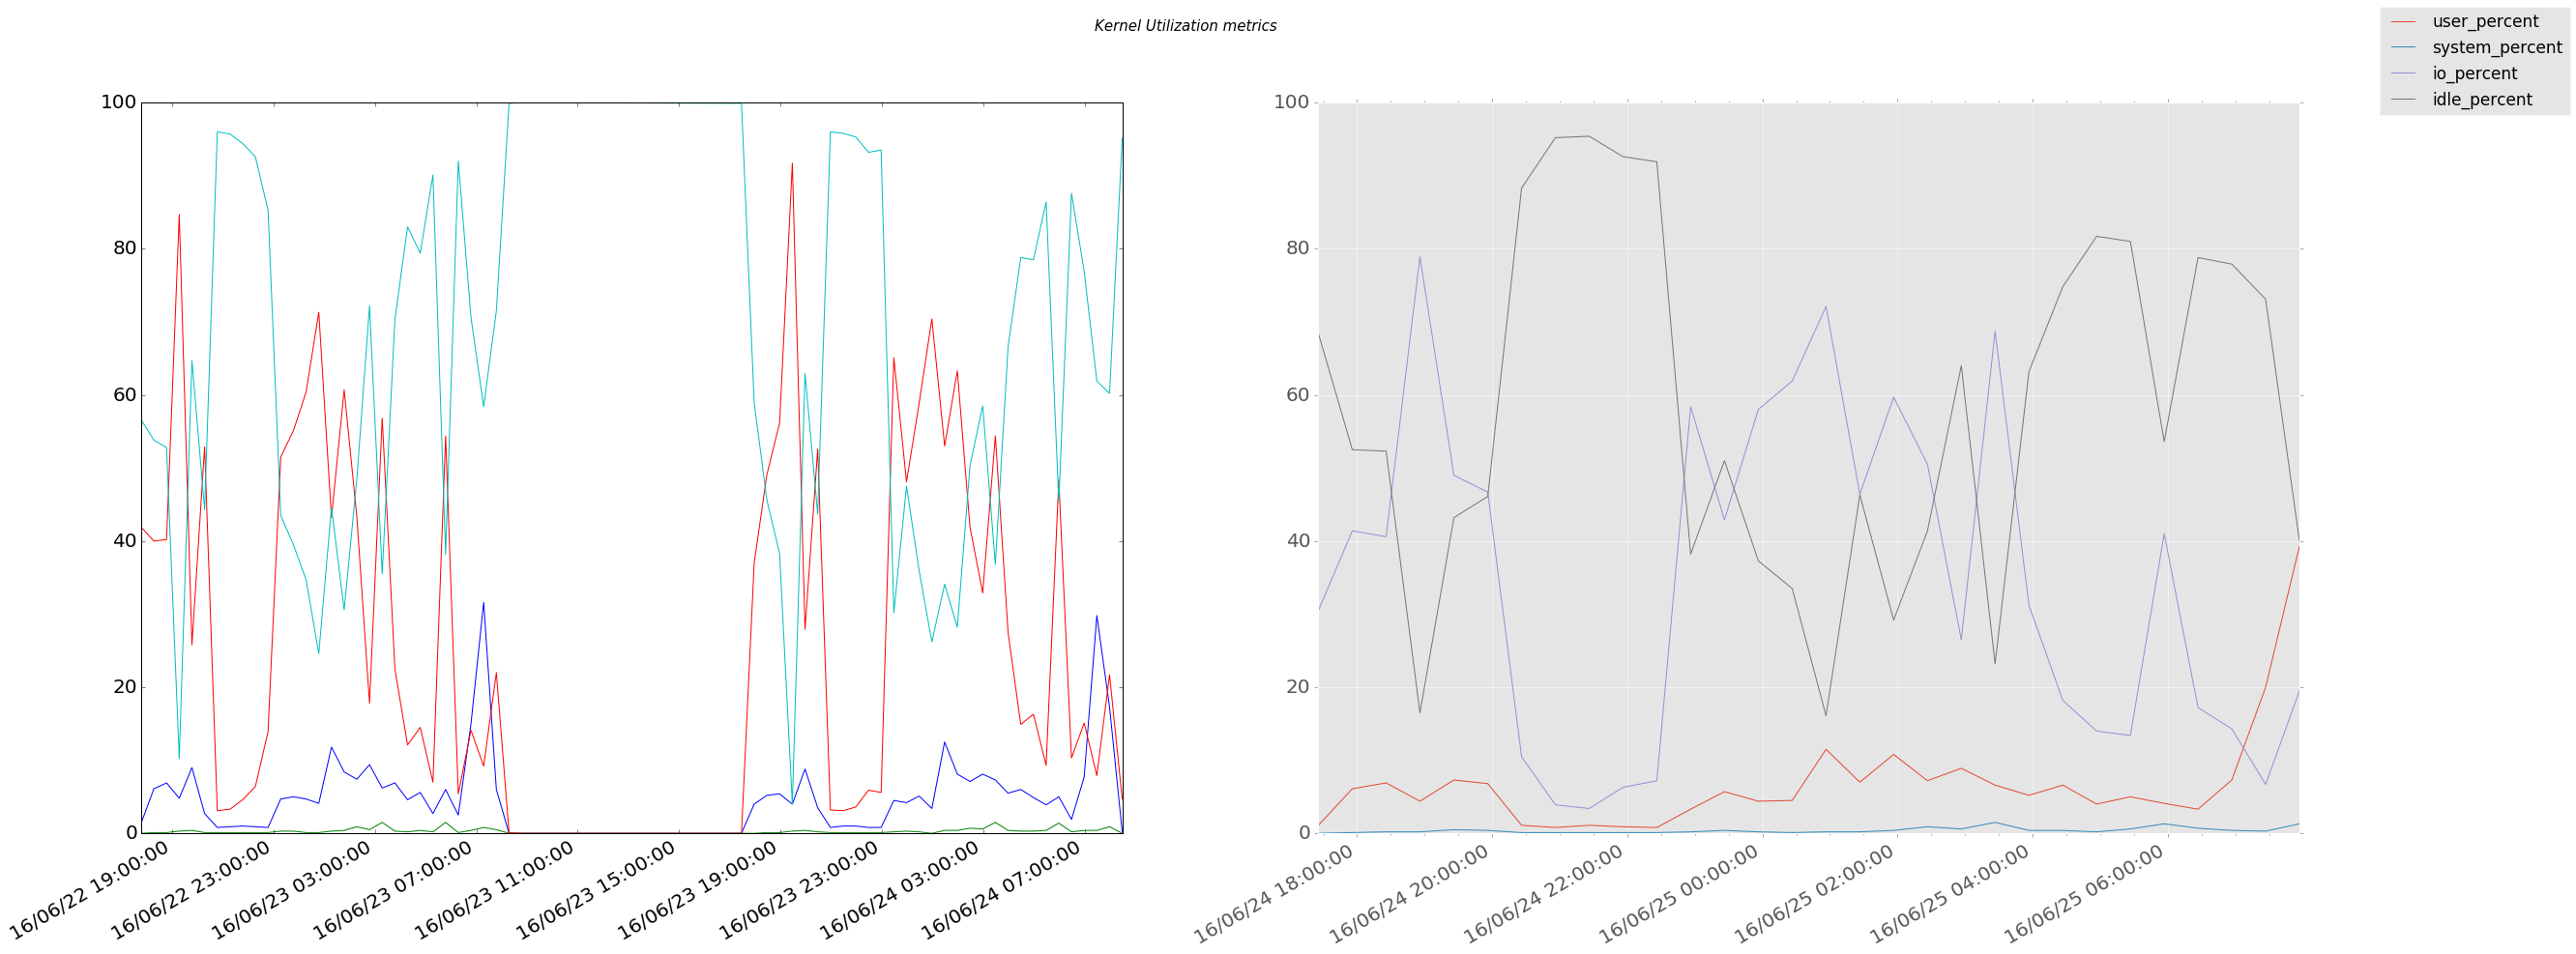

In [5]:
# define the figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 40
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size

minorLocator = AutoMinorLocator()  # compute automatically the minor tick to place on x-axis, no label for those ticks
plt.figure(1)  # define the size of the graph
plt.subplot(121)
plt.style.use('ggplot') # define the graph predefined style
plt.suptitle('Kernel Utilization metrics', fontsize=15,style='oblique', color='black') #define a title for the graph
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y/%m/%d %H:%M:%S'))  # define the format of the major tick
plt.gca().xaxis.set_minor_locator(minorLocator)  # define the position of the minor ticks
plt.gcf().autofmt_xdate()  # format the x-axis label in diagonale so it's readable and the labels don't overlap
plt.xticks(size=20) #define the size for the x label
plt.yticks(size=20) #define the size for the y label
# quick explanation about plot syntax
# the first arguments is the 'x axis', the second arguments is the list of value to draw
# the values to draw is by selecting the values from the dataframe
# [:,2:6] means I take all rows then the 2nd up to the 6th column excluded
# label is used to draw a legend within th graph
plt.plot(x_1,data_1.ix[:,2:3], label="user_percent")
plt.plot(x_1,data_1.ix[:,3:4], label="system_percent")
plt.plot(x_1,data_1.ix[:,4:5], label="io_percent")
plt.plot(x_1,data_1.ix[:,5:6], label="idle_percent")
plt.legend(bbox_to_anchor=(1, 1),loc=1,bbox_transform=plt.gcf().transFigure,fontsize=17)

plt.subplot(122)
plt.style.use('ggplot') # define the graph predefined style
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y/%m/%d %H:%M:%S'))  # define the format of the major tick
plt.gca().xaxis.set_minor_locator(minorLocator)  # define the position of the minor ticks
plt.gcf().autofmt_xdate()  # format the x-axis label in diagonale so it's readable and the labels don't overlap
plt.xticks(size=20) #define the size for the x label
plt.yticks(size=20) #define the size for the y label
# quick explanation about plot syntax
# the first arguments is the 'x axis', the second arguments is the list of value to draw
# the values to draw is by selecting the values from the dataframe
# [:,2:6] means I take all rows then the 2nd up to the 6th column excluded
# label is used to draw a legend within th graph
plt.plot(x_2,data_2.ix[:,2:3], label="user_percent")
plt.plot(x_2,data_2.ix[:,3:4], label="system_percent")
plt.plot(x_2,data_2.ix[:,4:5], label="io_percent")
plt.plot(x_2,data_2.ix[:,5:6], label="idle_percent")
plt.legend(bbox_to_anchor=(1, 1),loc=1,bbox_transform=plt.gcf().transFigure,fontsize=17)

#### <font color='blue'> let's plot context switch metrics </font>

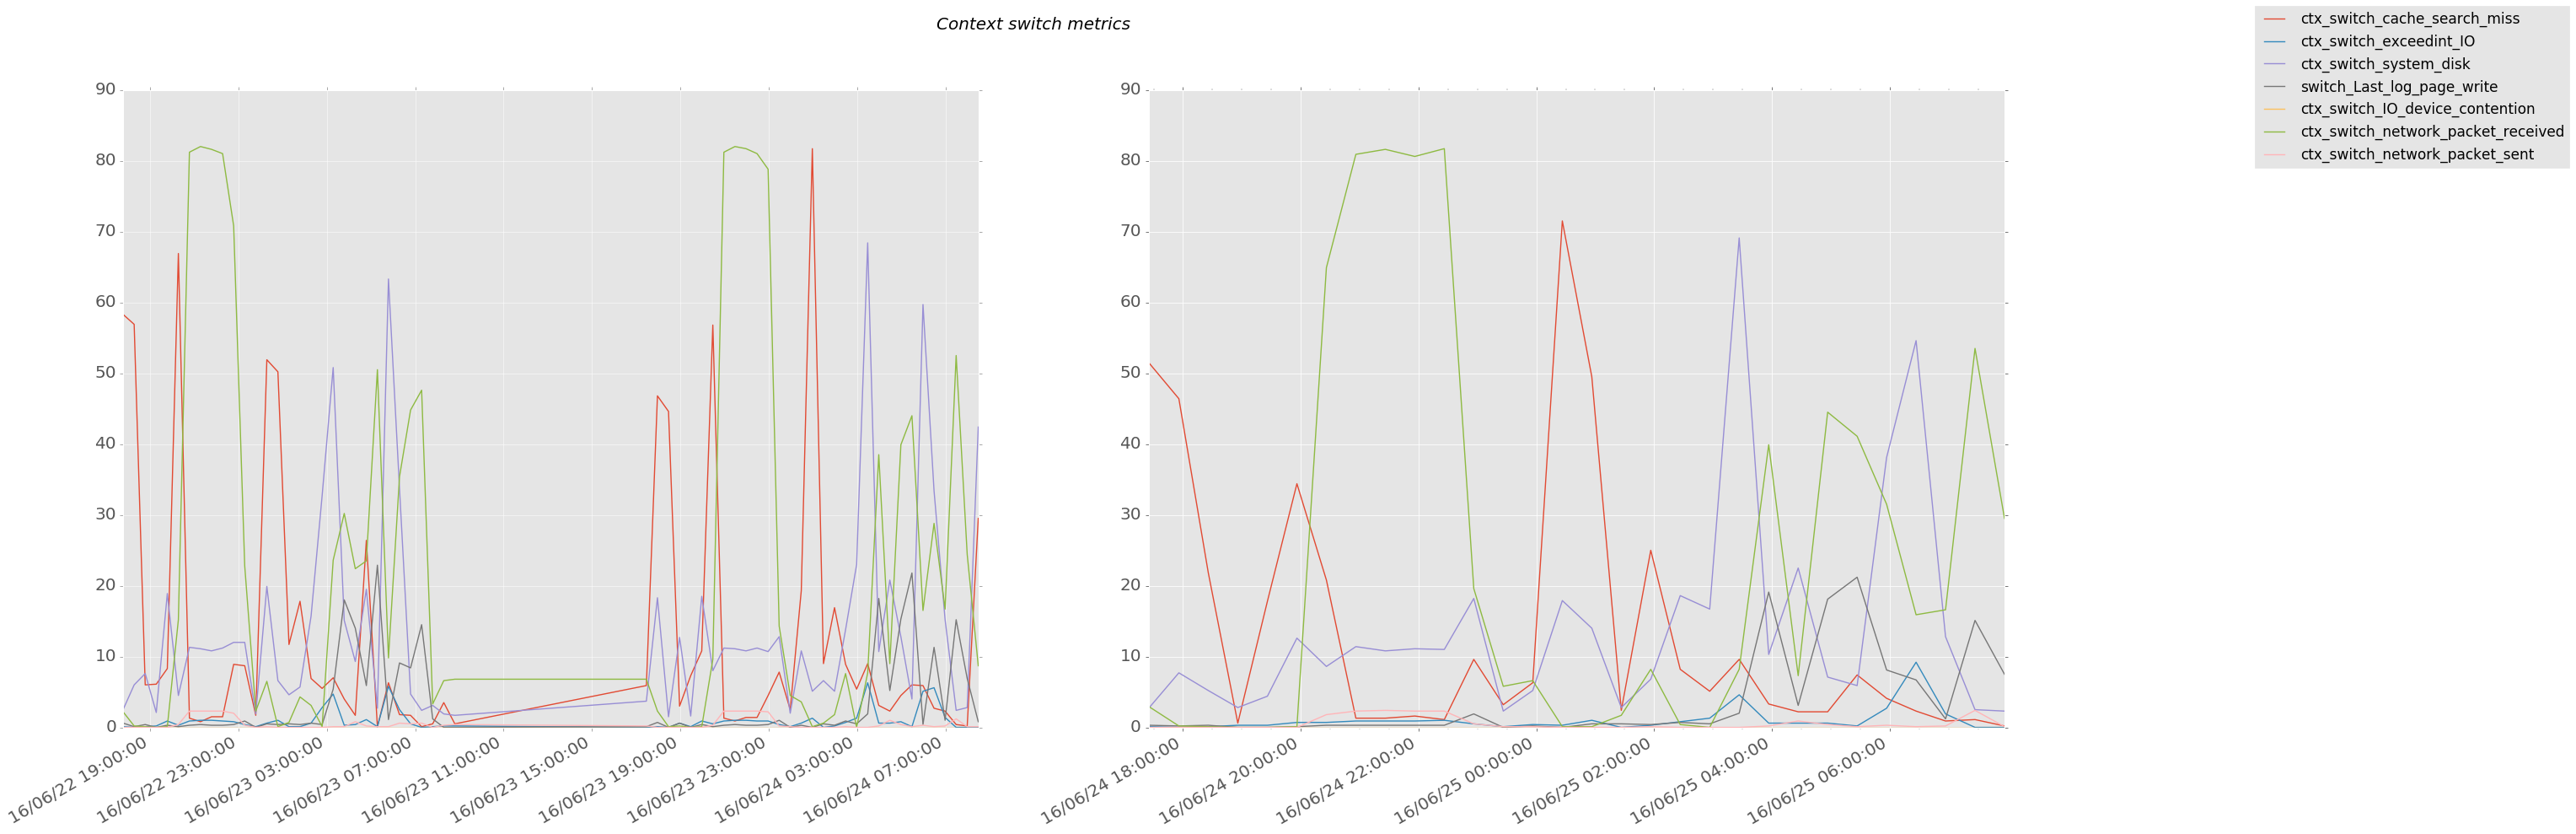

In [6]:
# define the figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 40
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size

minorLocator = AutoMinorLocator()
plt.figure(1)  # define the size of the graph
plt.subplot(121)
plt.style.use('seaborn-paper') # define the graph predefined style
plt.suptitle('Context switch metrics', fontsize=20,style='oblique', color='black') #define a title for the graph
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y/%m/%d %H:%M:%S'))  # define the format of the major tick
plt.gca().xaxis.set_minor_locator(minorLocator)  # define the position of the minor ticks
plt.gcf().autofmt_xdate()  # format the x-axis label in diagonale so it's readable and the labels don't overlap
plt.xticks(size=20) #define the size for the x label
plt.yticks(size=20) #define the size for the y label
plt.plot(x_1,data_1.ix[:,6:7], label="ctx_switch_cache_search_miss")
plt.plot(x_1,data_1.ix[:,7:8], label="ctx_switch_exceedint_IO")
plt.plot(x_1,data_1.ix[:,8:9], label="ctx_switch_system_disk")
plt.plot(x_1,data_1.ix[:,9:10], label="switch_Last_log_page_write")
plt.plot(x_1,data_1.ix[:,10:11], label="ctx_switch_IO_device_contention")
plt.plot(x_1,data_1.ix[:,11:12], label="ctx_switch_network_packet_received")
plt.plot(x_1,data_1.ix[:,12:13], label="ctx_switch_network_packet_sent")
plt.legend(bbox_to_anchor=(1, 1),loc=2,bbox_transform=plt.gcf().transFigure,fontsize=17)

plt.subplot(122)
plt.style.use('seaborn-paper') # define the graph predefined style
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y/%m/%d %H:%M:%S'))  # define the format of the major tick
plt.gca().xaxis.set_minor_locator(minorLocator)  # define the position of the minor ticks
plt.gcf().autofmt_xdate()  # format the x-axis label in diagonale so it's readable and the labels don't overlap
plt.xticks(size=20) #define the size for the x label
plt.yticks(size=20) #define the size for the y label
plt.plot(x_2,data_2.ix[:,6:7], label="ctx_switch_cache_search_miss")
plt.plot(x_2,data_2.ix[:,7:8], label="ctx_switch_exceedint_IO")
plt.plot(x_2,data_2.ix[:,8:9], label="ctx_switch_system_disk")
plt.plot(x_2,data_2.ix[:,9:10], label="switch_Last_log_page_write")
plt.plot(x_2,data_2.ix[:,10:11], label="ctx_switch_IO_device_contention")
plt.plot(x_2,data_2.ix[:,11:12], label="ctx_switch_network_packet_received")
plt.plot(x_2,data_2.ix[:,12:13], label="ctx_switch_network_packet_sent")
plt.legend(bbox_to_anchor=(1, 1),loc=2,bbox_transform=plt.gcf().transFigure,fontsize=17)

#### <font color='blue'> let's plot ULC metrics </font>

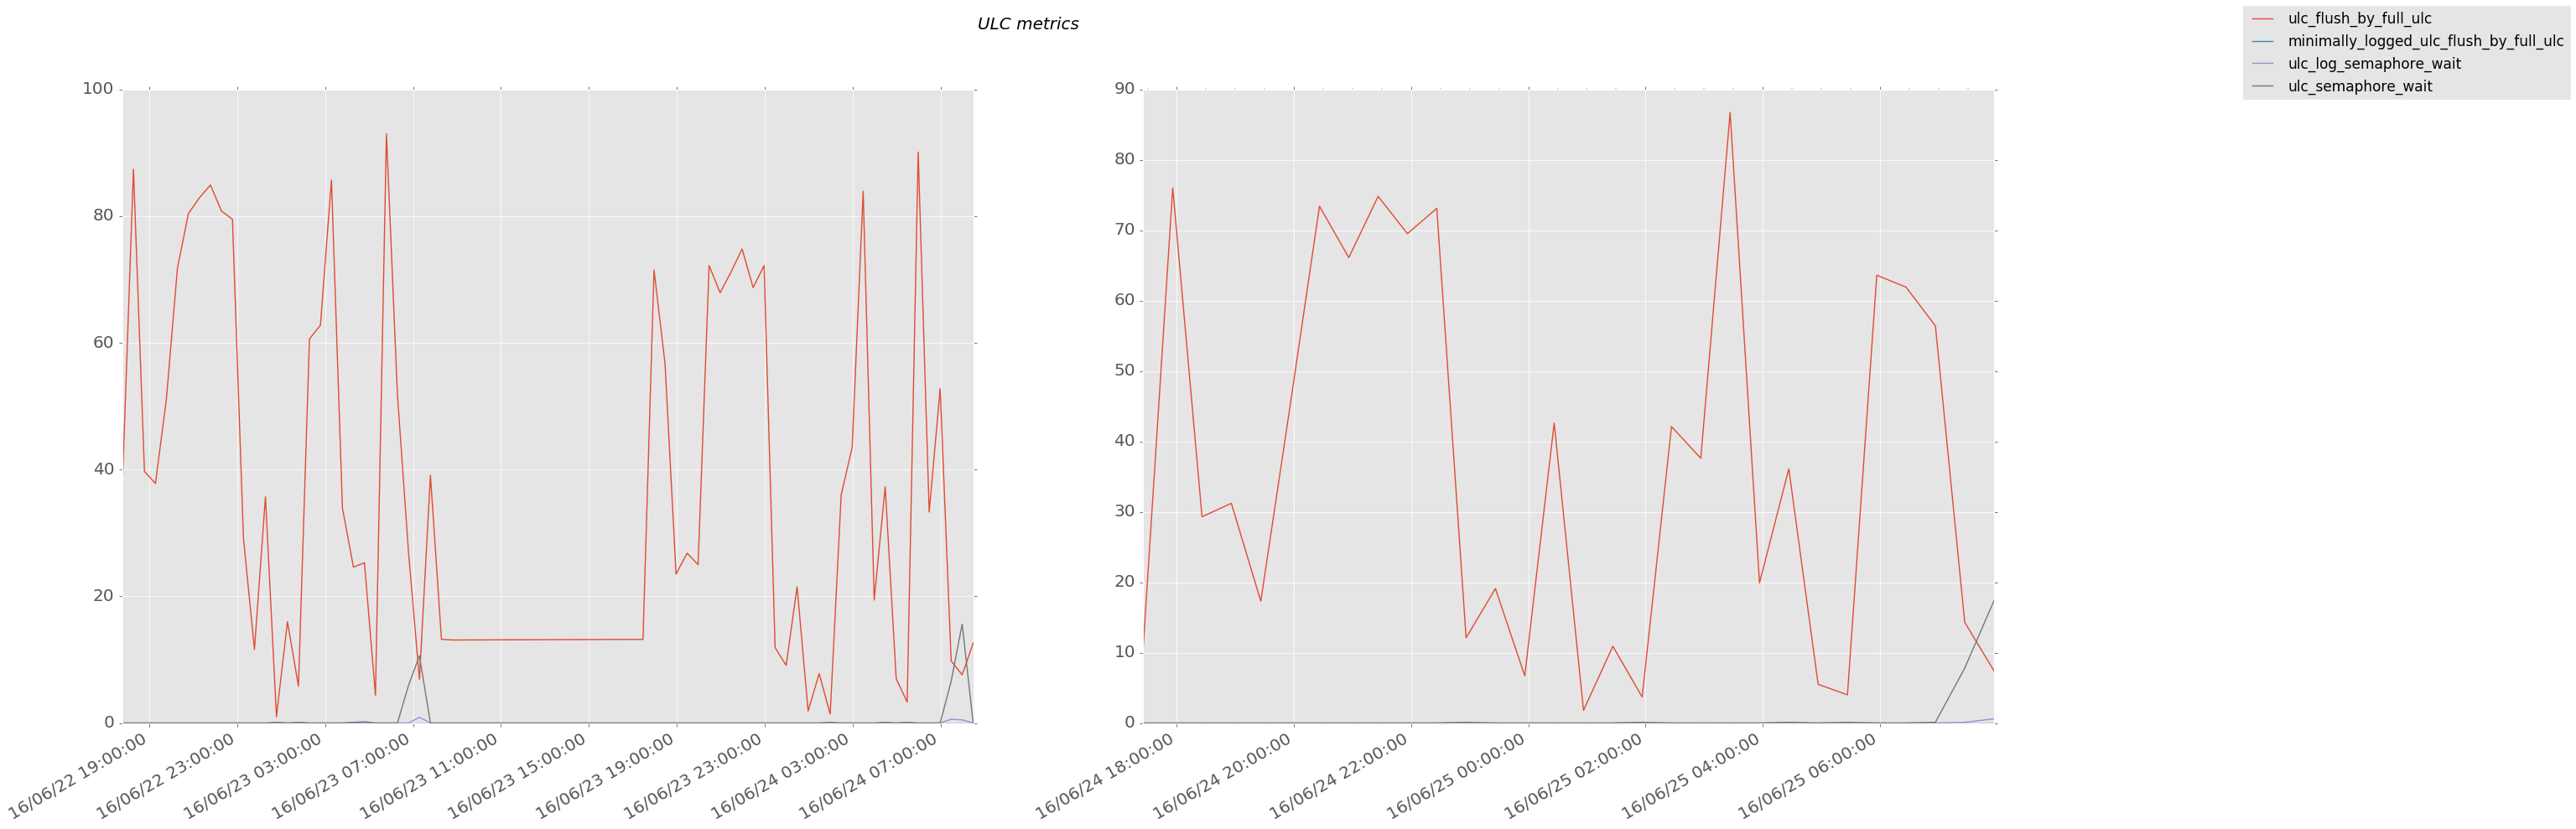

In [7]:
# define the figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 40
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size

minorLocator = AutoMinorLocator()
plt.figure(1)  # define the size of the graph
plt.subplot(121)
plt.style.use('seaborn-paper') # define the graph predefined style
plt.suptitle('ULC metrics', fontsize=20,style='oblique', color='black') #define a title for the graph
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y/%m/%d %H:%M:%S'))  # define the format of the major tick
plt.gca().xaxis.set_minor_locator(minorLocator)  # define the position of the minor ticks
plt.gcf().autofmt_xdate()  # format the x-axis label in diagonale so it's readable and the labels don't overlap
plt.xticks(size=20) #define the size for the x label
plt.yticks(size=20) #define the size for the y label
plt.plot(x_1,data_1.ix[:,14:15], label="ulc_flush_by_full_ulc")
plt.plot(x_1,data_1.ix[:,15:16], label="minimally_logged_ulc_flush_by_full_ulc")
plt.plot(x_1,data_1.ix[:,16:17], label="ulc_log_semaphore_wait")
plt.plot(x_1,data_1.ix[:,17:18], label="ulc_semaphore_wait")
plt.legend(bbox_to_anchor=(1, 1),loc=2,bbox_transform=plt.gcf().transFigure,fontsize=17)

plt.subplot(122)
plt.style.use('seaborn-paper') # define the graph predefined style
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y/%m/%d %H:%M:%S'))  # define the format of the major tick
plt.gca().xaxis.set_minor_locator(minorLocator)  # define the position of the minor ticks
plt.gcf().autofmt_xdate()  # format the x-axis label in diagonale so it's readable and the labels don't overlap
plt.xticks(size=20) #define the size for the x label
plt.yticks(size=20) #define the size for the y label
plt.plot(x_2,data_2.ix[:,14:15], label="ulc_flush_by_full_ulc")
plt.plot(x_2,data_2.ix[:,15:16], label="minimally_logged_ulc_flush_by_full_ulc")
plt.plot(x_2,data_2.ix[:,16:17], label="ulc_log_semaphore_wait")
plt.plot(x_2,data_2.ix[:,17:18], label="ulc_semaphore_wait")
plt.legend(bbox_to_anchor=(1, 1),loc=2,bbox_transform=plt.gcf().transFigure,fontsize=17)

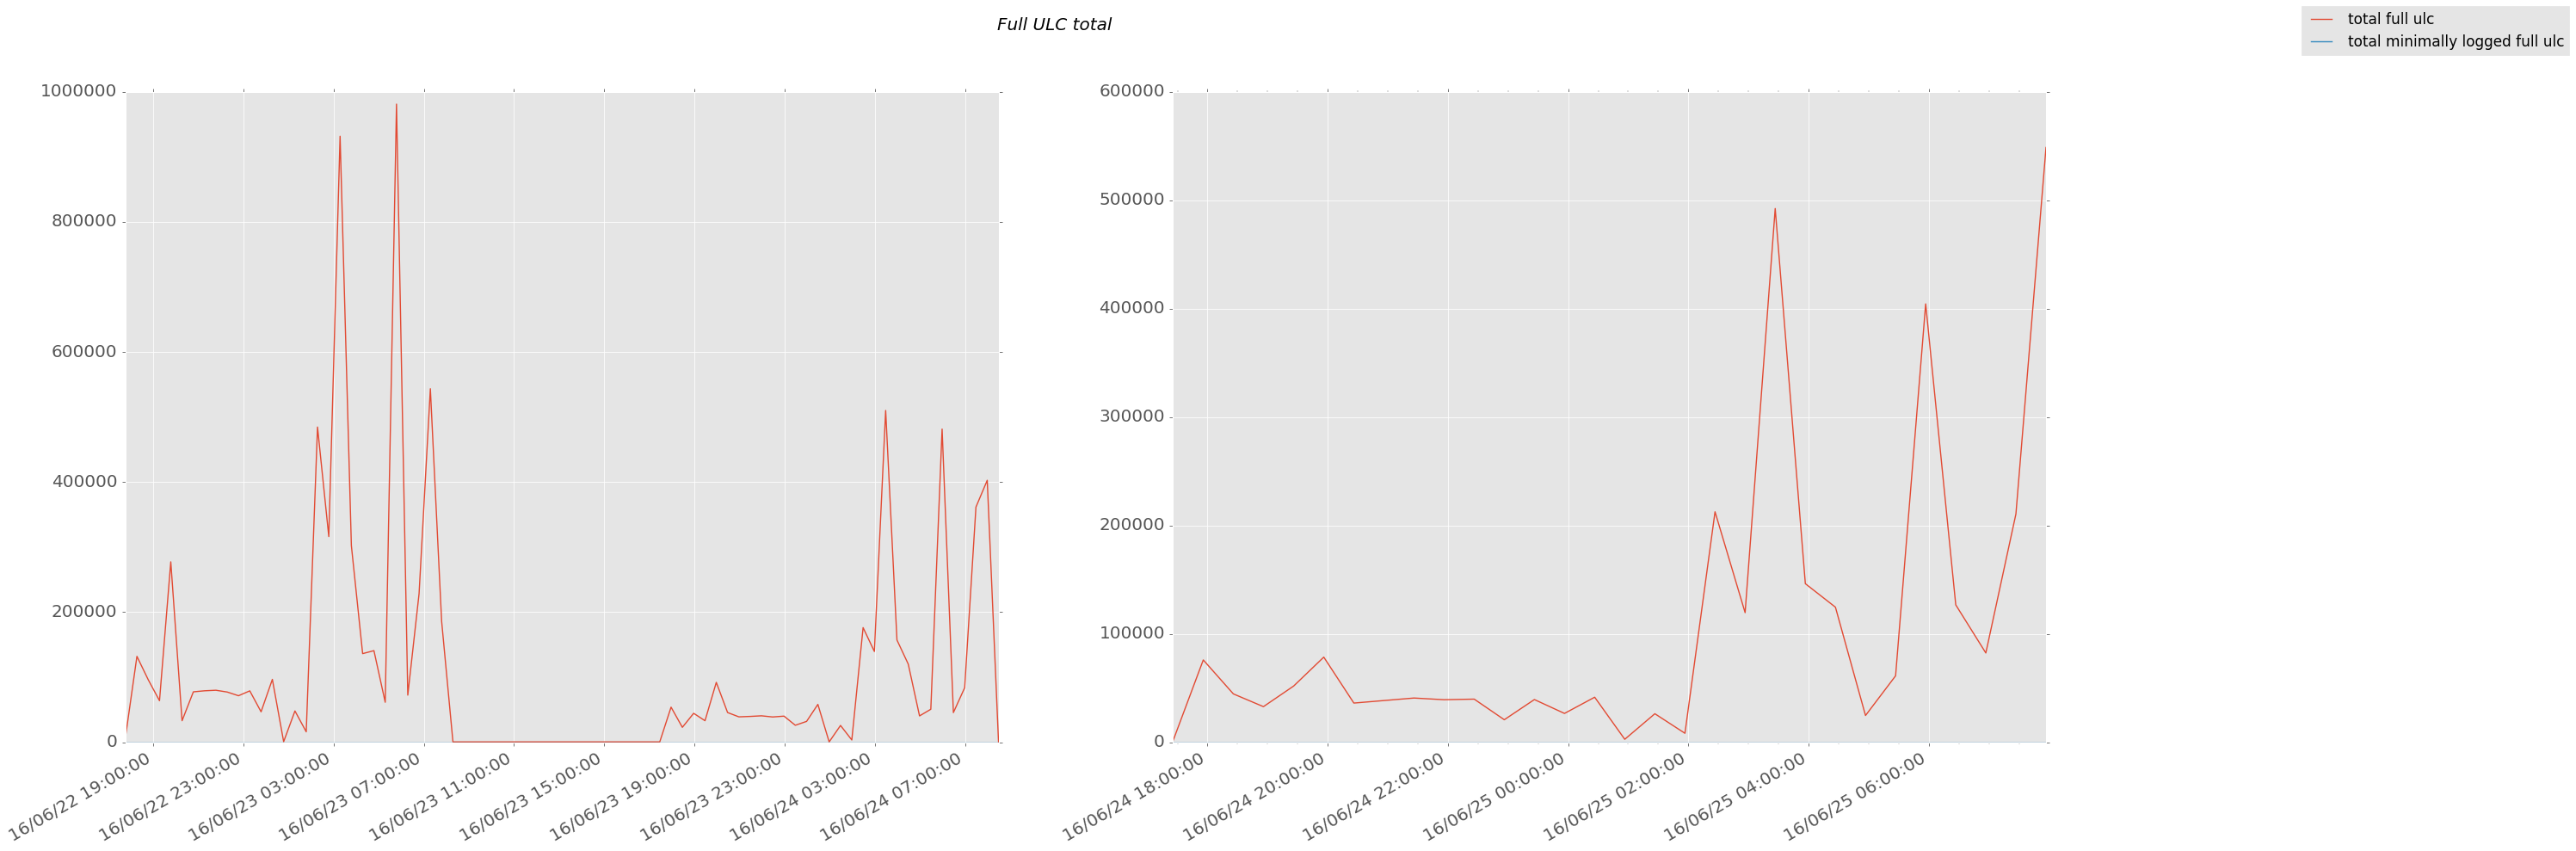

In [8]:
# define the figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 40
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size

minorLocator = AutoMinorLocator()
plt.figure(1)  # define the size of the graph
plt.subplot(121)
plt.style.use('seaborn-paper') # define the graph predefined style
plt.suptitle('Full ULC total', fontsize=20,style='oblique', color='black') #define a title for the graph
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y/%m/%d %H:%M:%S'))  # define the format of the major tick
plt.gca().xaxis.set_minor_locator(minorLocator)  # define the position of the minor ticks
plt.gcf().autofmt_xdate()  # format the x-axis label in diagonale so it's readable and the labels don't overlap
plt.xticks(size=20) #define the size for the x label
plt.yticks(size=20) #define the size for the y label
plt.plot(x_1,data_1.ix[:,40:41], label="total full ulc")
plt.plot(x_1,data_1.ix[:,41:42], label="total minimally logged full ulc")
plt.legend(bbox_to_anchor=(1, 1),loc=2,bbox_transform=plt.gcf().transFigure,fontsize=17)

plt.subplot(122)
plt.style.use('seaborn-paper') # define the graph predefined style
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y/%m/%d %H:%M:%S'))  # define the format of the major tick
plt.gca().xaxis.set_minor_locator(minorLocator)  # define the position of the minor ticks
plt.gcf().autofmt_xdate()  # format the x-axis label in diagonale so it's readable and the labels don't overlap
plt.xticks(size=20) #define the size for the x label
plt.yticks(size=20) #define the size for the y label
plt.plot(x_2,data_2.ix[:,40:41], label="total full ulc")
plt.plot(x_2,data_2.ix[:,41:42], label="total minimally logged full ulc")
plt.legend(bbox_to_anchor=(1, 1),loc=2,bbox_transform=plt.gcf().transFigure,fontsize=17)

#### <font color='blue'> let's plot Data cache metrics </font>

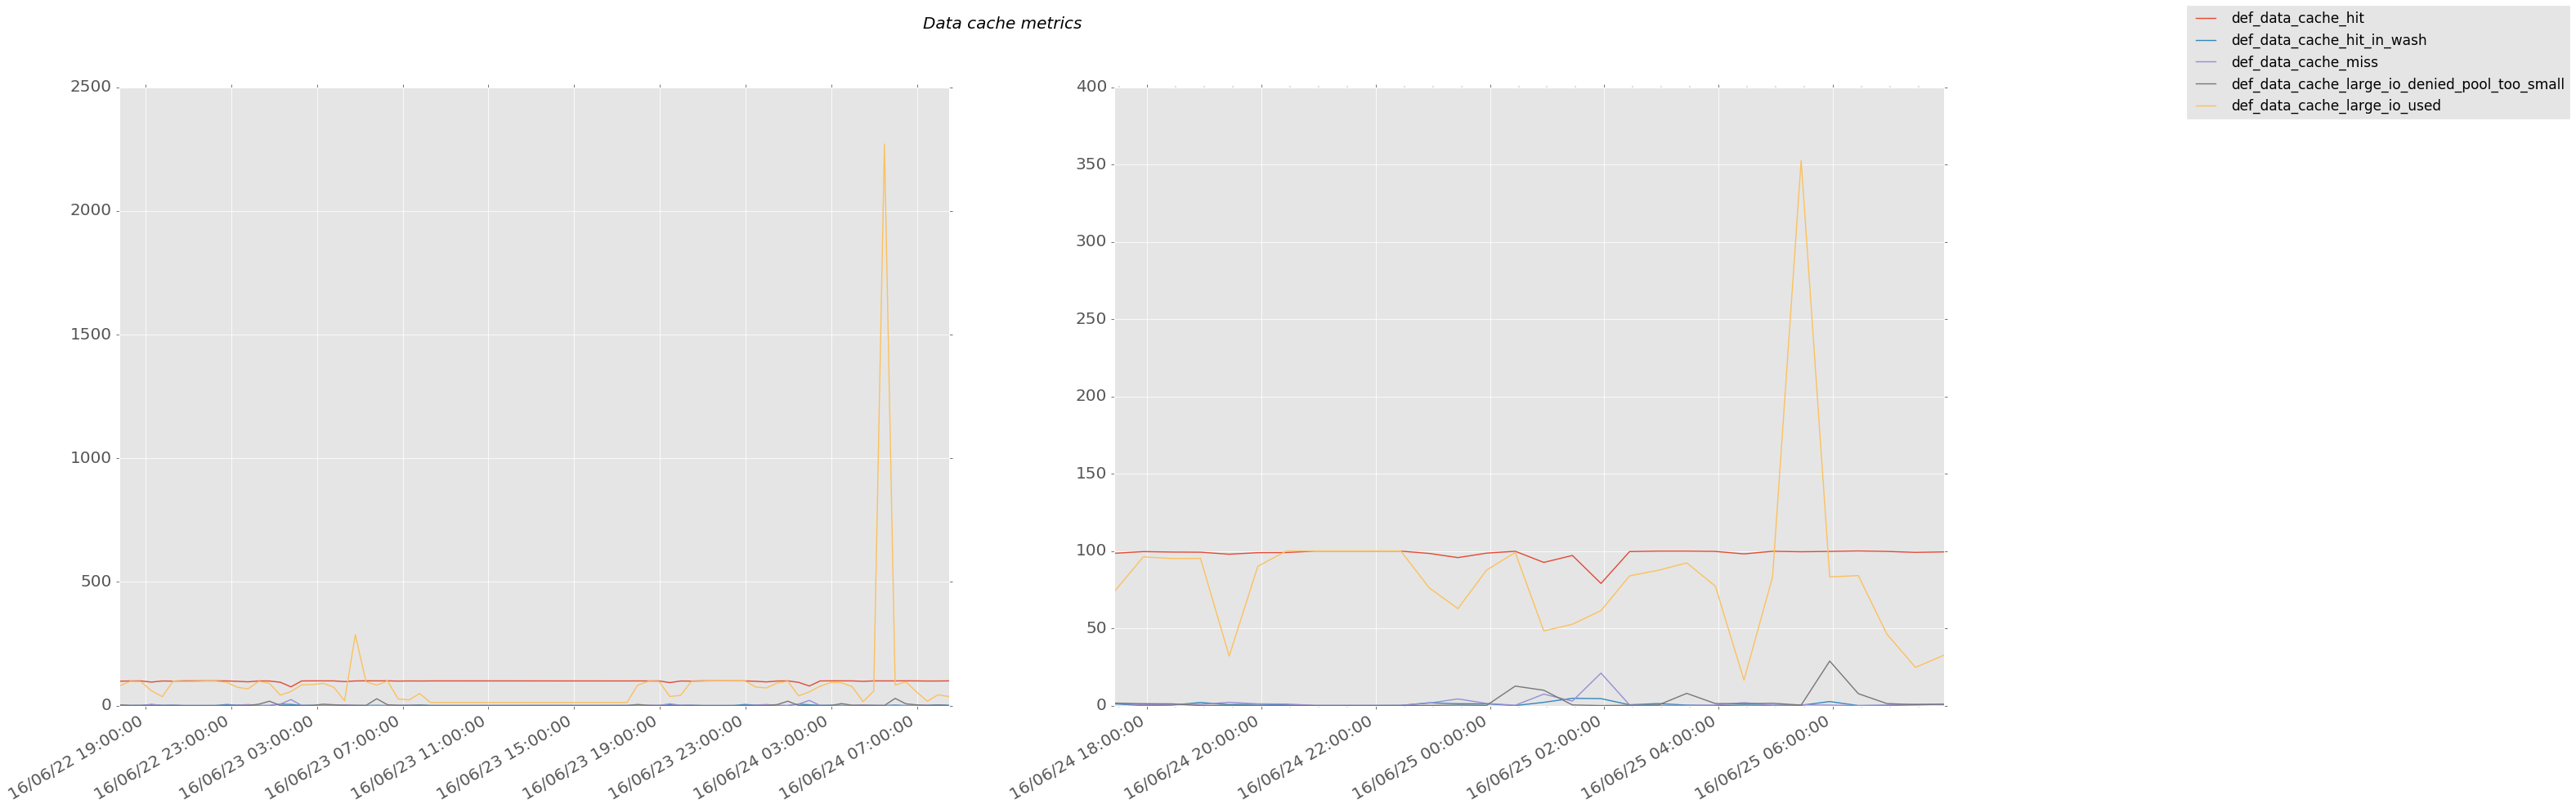

In [9]:
# define the figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 40
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size

minorLocator = AutoMinorLocator()
plt.figure()  # define the size of the graph
plt.subplot(121)
plt.style.use('seaborn-paper') # define the graph predefined style
plt.suptitle('Data cache metrics', fontsize=20,style='oblique', color='black') #define a title for the graph
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y/%m/%d %H:%M:%S'))  # define the format of the major tick
plt.gca().xaxis.set_minor_locator(minorLocator)  # define the position of the minor ticks
plt.gcf().autofmt_xdate()  # format the x-axis label in diagonale so it's readable and the labels don't overlap
plt.xticks(size=20) #define the size for the x label
plt.yticks(size=20) #define the size for the y label
#plt.plot(x_1,data.ix[:,18:19], label="all_caches_hit")
#plt.plot(x_1,data.ix[:,19:20], label="all_caches_miss")
#plt.plot(x_1,data.ix[:,20:21], label="all_caches_buffer_grabbed_dirty")
#plt.plot(x_1,data.ix[:,21:22], label="all_caches_large_io_denied_pool_too_small")
#plt.plot(x_1,data.ix[:,22:23], label="all_caches_large_io_effectiveness")
plt.plot(x_1,data_1.ix[:,23:24], label="def_data_cache_hit")
plt.plot(x_1,data_1.ix[:,24:25], label="def_data_cache_hit_in_wash")
plt.plot(x_1,data_1.ix[:,25:26], label="def_data_cache_miss")
plt.plot(x_1,data_1.ix[:,26:27], label="def_data_cache_large_io_denied_pool_too_small")
plt.plot(x_1,data_1.ix[:,27:28], label="def_data_cache_large_io_used")
plt.legend(bbox_to_anchor=(1, 1),loc=2,bbox_transform=plt.gcf().transFigure,fontsize=17)

plt.subplot(122)
plt.style.use('seaborn-paper') # define the graph predefined style
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y/%m/%d %H:%M:%S'))  # define the format of the major tick
plt.gca().xaxis.set_minor_locator(minorLocator)  # define the position of the minor ticks
plt.gcf().autofmt_xdate()  # format the x-axis label in diagonale so it's readable and the labels don't overlap
plt.xticks(size=20) #define the size for the x label
plt.yticks(size=20) #define the size for the y label
#plt.plot(x_1,data.ix[:,18:19], label="all_caches_hit")
#plt.plot(x_1,data.ix[:,19:20], label="all_caches_miss")
#plt.plot(x_1,data.ix[:,20:21], label="all_caches_buffer_grabbed_dirty")
#plt.plot(x_1,data.ix[:,21:22], label="all_caches_large_io_denied_pool_too_small")
#plt.plot(x_1,data.ix[:,22:23], label="all_caches_large_io_effectiveness")
plt.plot(x_2,data_2.ix[:,23:24], label="def_data_cache_hit")
plt.plot(x_2,data_2.ix[:,24:25], label="def_data_cache_hit_in_wash")
plt.plot(x_2,data_2.ix[:,25:26], label="def_data_cache_miss")
plt.plot(x_2,data_2.ix[:,26:27], label="def_data_cache_large_io_denied_pool_too_small")
plt.plot(x_2,data_2.ix[:,27:28], label="def_data_cache_large_io_used")
plt.legend(bbox_to_anchor=(1, 1),loc=2,bbox_transform=plt.gcf().transFigure,fontsize=17)

#### <font color='blue'> let's plot outstanding IO metrics </font>

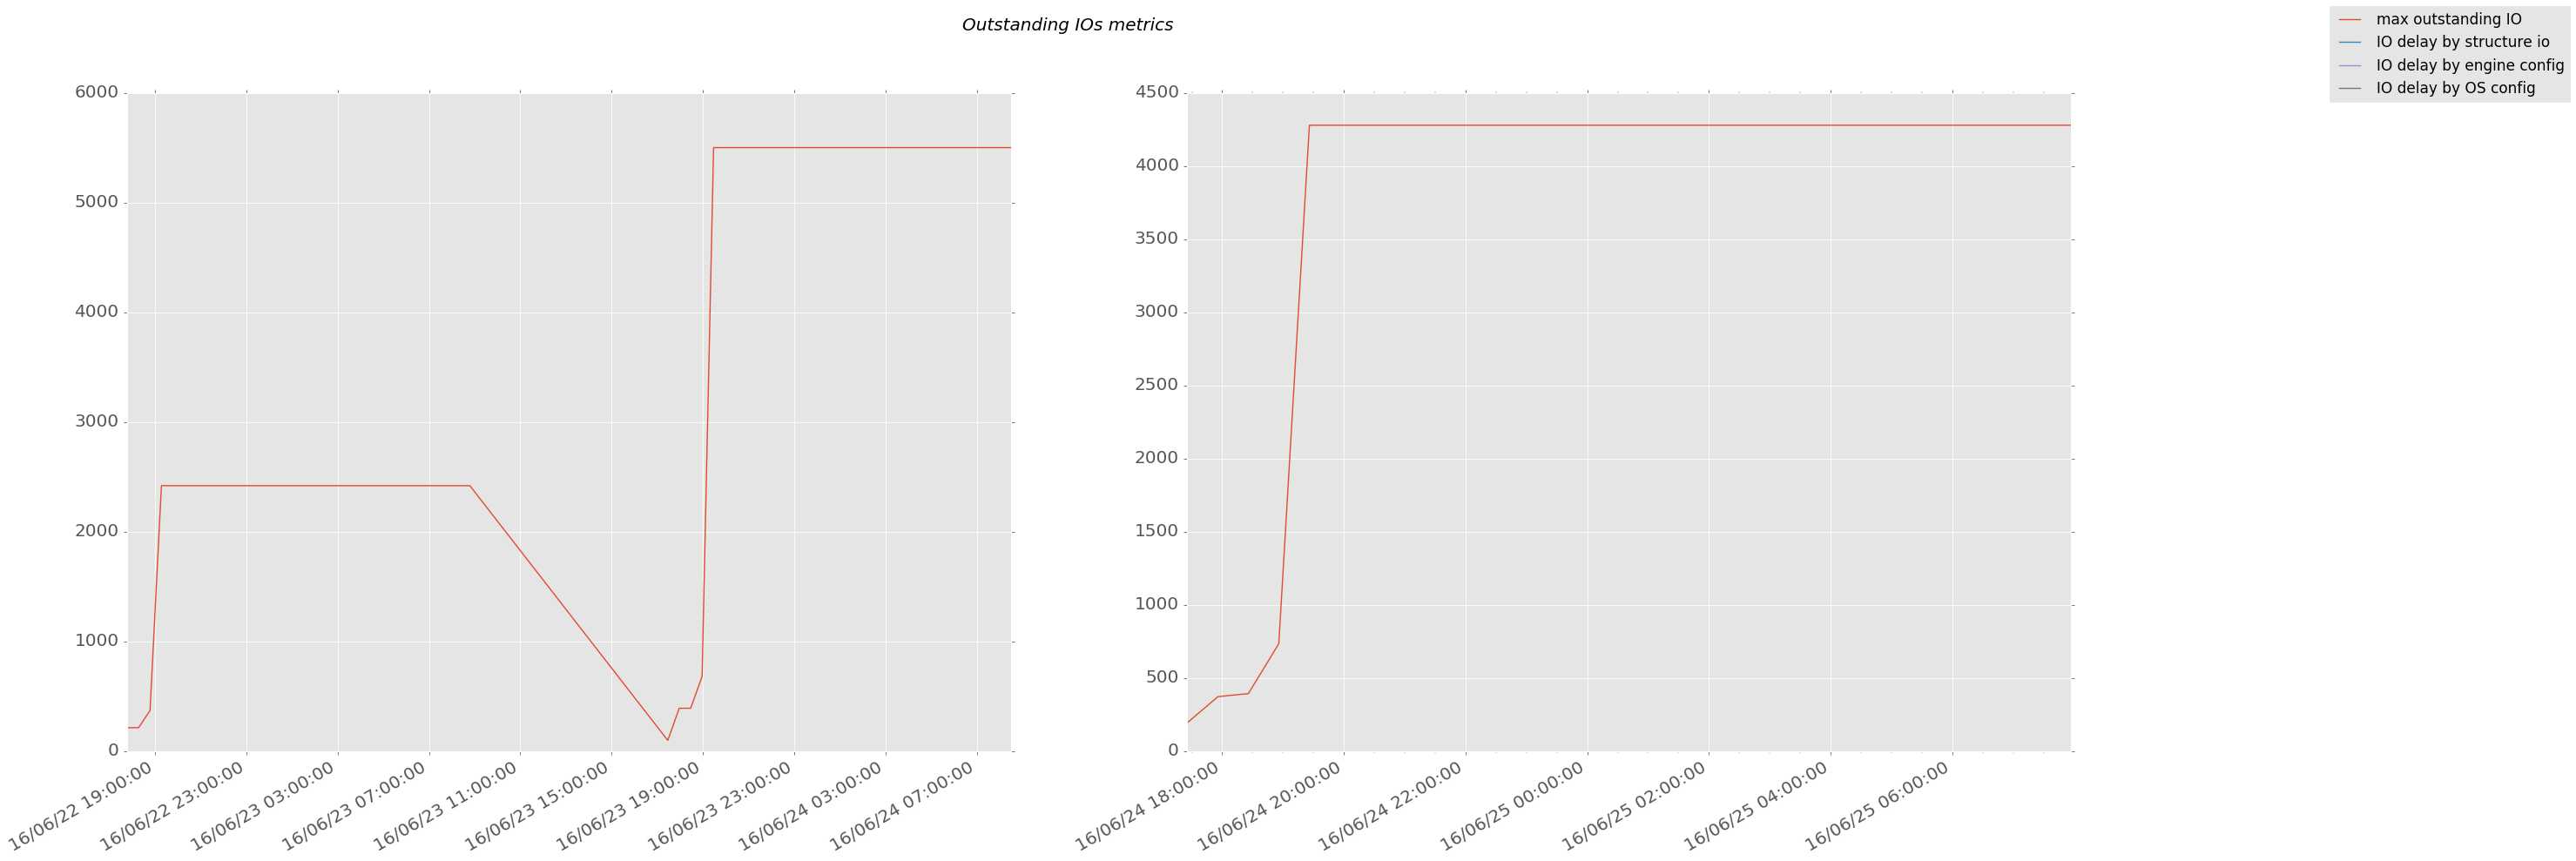

In [10]:
# define the figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 40
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size

minorLocator = AutoMinorLocator()
plt.figure()  # define the size of the graph
plt.subplot(121)
plt.style.use('seaborn-paper') # define the graph predefined style
plt.suptitle('Outstanding IOs metrics', fontsize=20,style='oblique', color='black') #define a title for the graph
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y/%m/%d %H:%M:%S'))  # define the format of the major tick
plt.gca().xaxis.set_minor_locator(minorLocator)  # define the position of the minor ticks
plt.gcf().autofmt_xdate()  # format the x-axis label in diagonale so it's readable and the labels don't overlap
plt.xticks(size=20) #define the size for the x label
plt.yticks(size=20) #define the size for the y label
plt.plot(x_1,data_1.ix[:,32:33], label="max outstanding IO")
plt.plot(x_1,data_1.ix[:,33:34], label="IO delay by structure io")
plt.plot(x_1,data_1.ix[:,34:35], label="IO delay by engine config")
plt.plot(x_1,data_1.ix[:,35:36], label="IO delay by OS config")
plt.legend(bbox_to_anchor=(1, 1),loc=2,bbox_transform=plt.gcf().transFigure,fontsize=17)

plt.subplot(122)
plt.style.use('seaborn-paper') # define the graph predefined style
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y/%m/%d %H:%M:%S'))  # define the format of the major tick
plt.gca().xaxis.set_minor_locator(minorLocator)  # define the position of the minor ticks
plt.gcf().autofmt_xdate()  # format the x-axis label in diagonale so it's readable and the labels don't overlap
plt.xticks(size=20) #define the size for the x label
plt.yticks(size=20) #define the size for the y label
plt.plot(x_2,data_2.ix[:,32:33], label="max outstanding IO")
plt.plot(x_2,data_2.ix[:,33:34], label="IO delay by structure io")
plt.plot(x_2,data_2.ix[:,34:35], label="IO delay by engine config")
plt.plot(x_2,data_2.ix[:,35:36], label="IO delay by OS config")
plt.legend(bbox_to_anchor=(1, 1),loc=2,bbox_transform=plt.gcf().transFigure,fontsize=17)

#### <font color='blue'> let's plot network metrics </font>

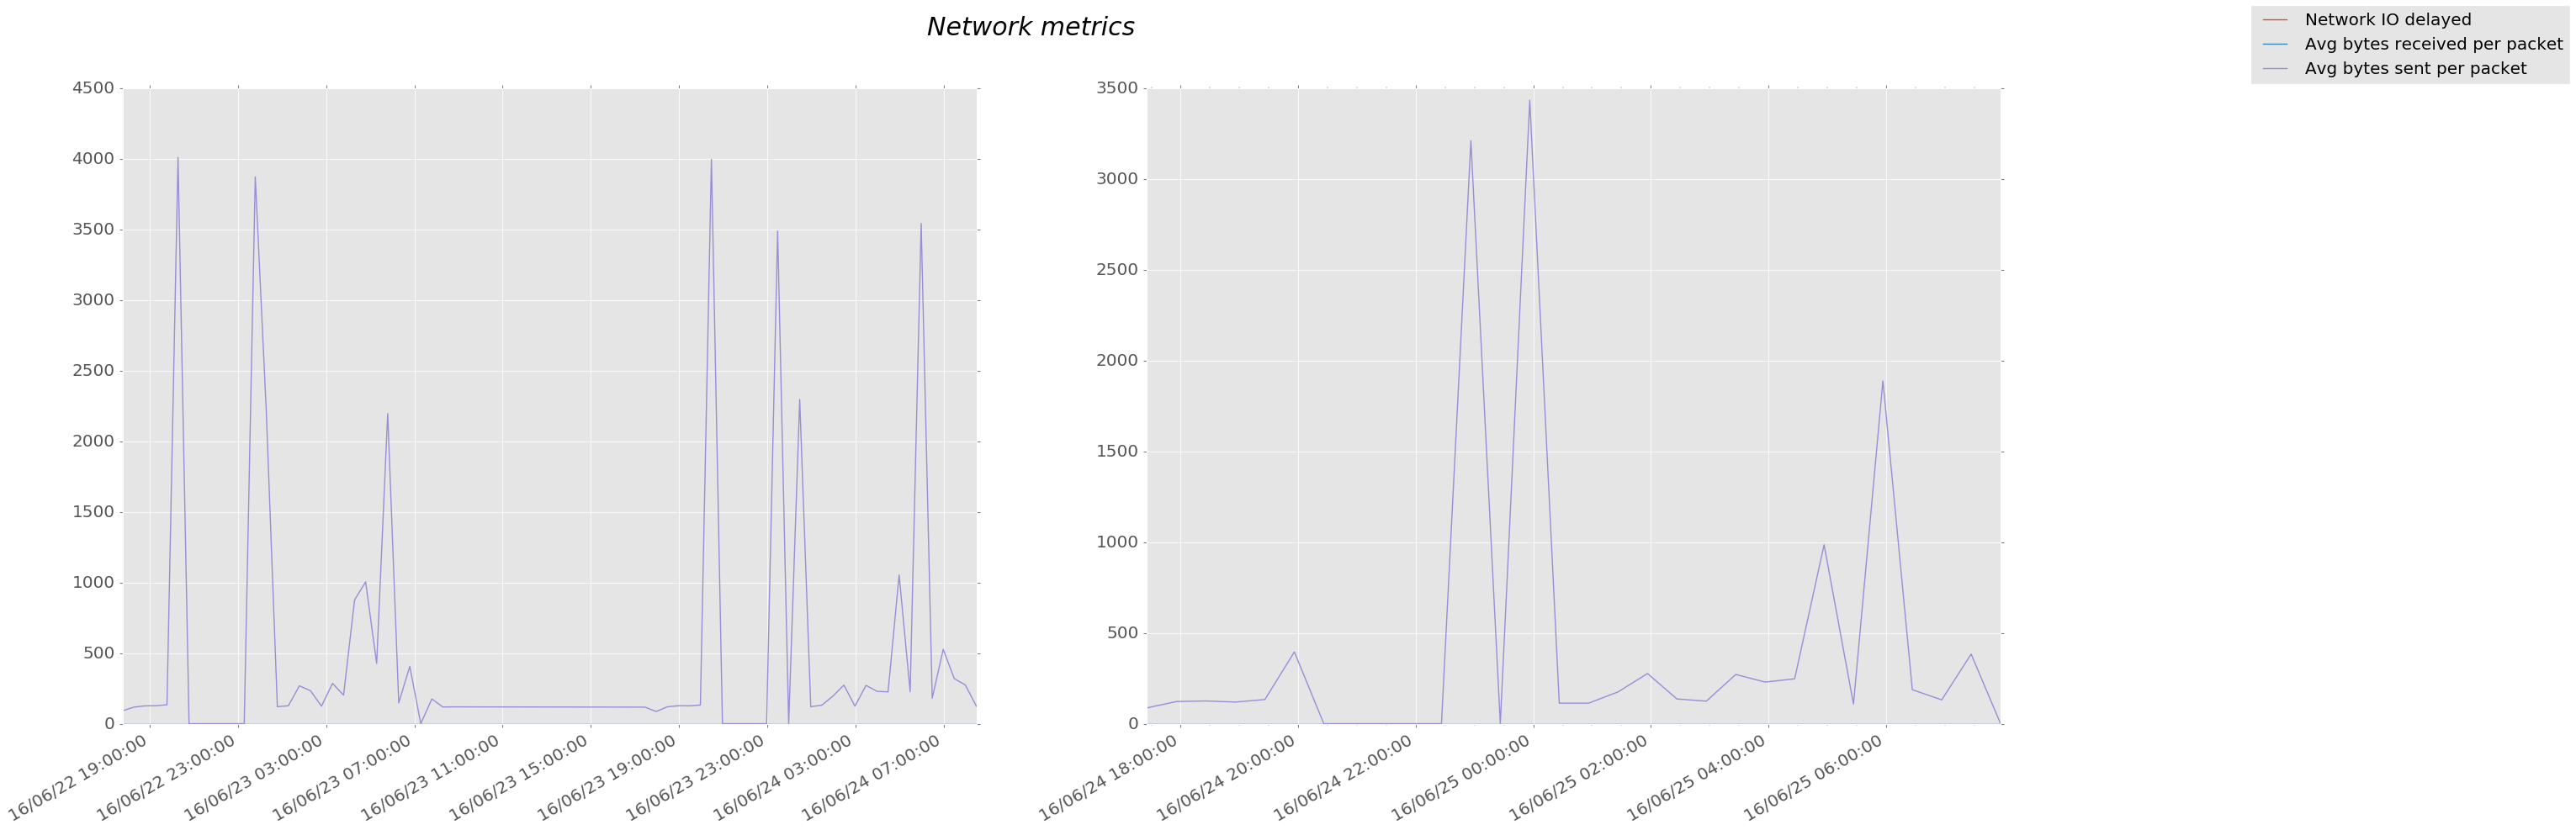

In [11]:
# define the figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 40
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size

minorLocator = AutoMinorLocator()
plt.figure()  # define the size of the graph
plt.subplot(121)
plt.style.use('seaborn-paper') # define the graph predefined style
plt.suptitle('Network metrics', fontsize=30,style='oblique', color='black') #define a title for the graph
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y/%m/%d %H:%M:%S'))  # define the format of the major tick
plt.gca().xaxis.set_minor_locator(minorLocator)  # define the position of the minor ticks
plt.gcf().autofmt_xdate()  # format the x-axis label in diagonale so it's readable and the labels don't overlap
plt.xticks(size=20) #define the size for the x label
plt.yticks(size=20) #define the size for the y label
plt.plot(x_1,data_1.ix[:,36:37], label="Network IO delayed")
plt.plot(x_1,data_1.ix[:,37:38], label="Avg bytes received per packet")
plt.plot(x_1,data_1.ix[:,38:39], label="Avg bytes sent per packet")
plt.legend(bbox_to_anchor=(1, 1),loc=2,bbox_transform=plt.gcf().transFigure,fontsize=20)

plt.subplot(122)
plt.style.use('seaborn-paper') # define the graph predefined style
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y/%m/%d %H:%M:%S'))  # define the format of the major tick
plt.gca().xaxis.set_minor_locator(minorLocator)  # define the position of the minor ticks
plt.gcf().autofmt_xdate()  # format the x-axis label in diagonale so it's readable and the labels don't overlap
plt.xticks(size=20) #define the size for the x label
plt.yticks(size=20) #define the size for the y label
plt.plot(x_2,data_2.ix[:,36:37], label="Network IO delayed")
plt.plot(x_2,data_2.ix[:,37:38], label="Avg bytes received per packet")
plt.plot(x_2,data_2.ix[:,38:39], label="Avg bytes sent per packet")
plt.legend(bbox_to_anchor=(1, 1),loc=2,bbox_transform=plt.gcf().transFigure,fontsize=20)